<a href="https://colab.research.google.com/github/BimalGhimire38/PyTorch_for_deep_learning/blob/main/Pytorch_Part_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Autograd

2082/08/24  09:22 PM, @ Har Har Mahadev, Room

2082/08/25  06:39 AM

In [47]:
def dy_dx(x):
  return 2*x


In [48]:
dy_dx(3)

6

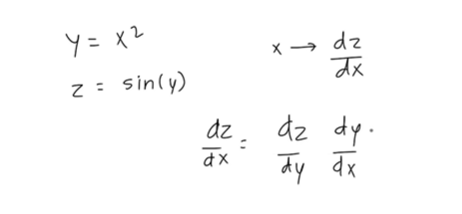

In [49]:
import math

def dz_dx(x):
  return 2*x*math.cos(x**2)

In [50]:
dz_dx(2)

-2.6145744834544478

# Training process of a Neural Network

1. Forward pass: Compute the output of the network given an input.

2. Calculate Loss: Calculate the loss function to quantify error.

3. Backward pass: Compute gradients of the loss with respect to the parameters.

4. Update Gradients: Adjust the parameters using an optimization algorithm ( e.g. gradient descent ).

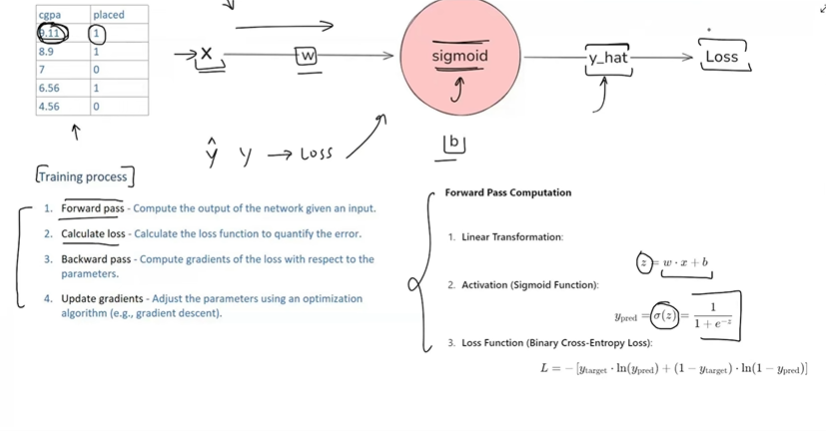

# What is Autograd

Autograd is a core componenet of PyTorch that provides automatic differentiation for tensor operations. It enables gradient computation, which is essential for training machine learning models using optimization algorithms like gradient descent.

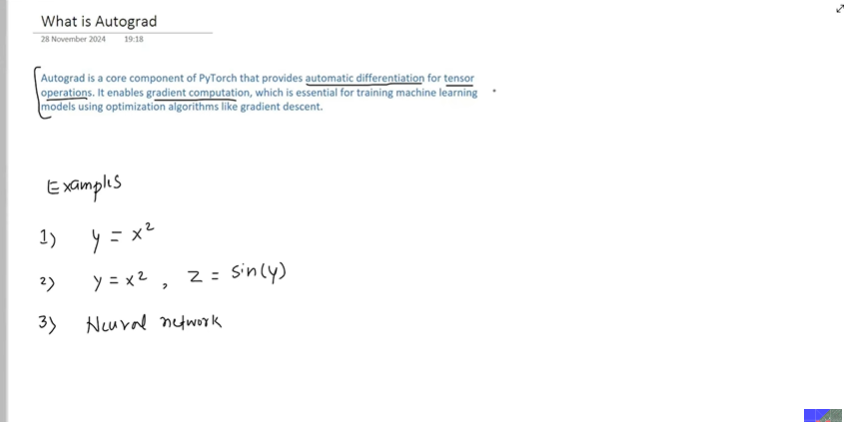

In [51]:
import torch

In [52]:
x = torch.tensor(3.0, requires_grad=True)

In [53]:
y = x**2

In [54]:
x

tensor(3., requires_grad=True)

In [55]:
y

tensor(9., grad_fn=<PowBackward0>)

Here PoWBackward0 means that pytorch remembers what operation was done on x to get y , for future use to calculate the derivative or gradient

In [56]:
y.backward()

In [57]:
x.grad

tensor(6.)

Example 2

In [58]:
x = torch.tensor(4.0, requires_grad = True)


In [59]:
y = x**2

In [60]:
z= torch.sin(y)

In [61]:
x

tensor(4., requires_grad=True)

In [62]:
y

tensor(16., grad_fn=<PowBackward0>)

In [63]:
z

tensor(-0.2879, grad_fn=<SinBackward0>)

In [64]:
z.backward()

In [65]:
x.grad

tensor(-7.6613)

In [66]:
y.grad

/tmp/ipython-input-486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  y.grad


# Manual Calculation of Gradient

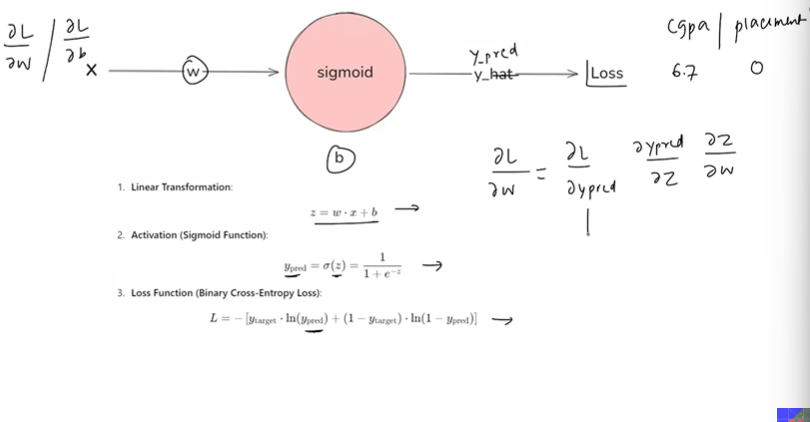

In [67]:
import torch

# INputs
x = torch.tensor(6.7) # Input feature
y = torch.tensor(0.0) # True label ( binary )


w = torch.tensor(1.0) # Weight
b = torch.tensor (0.0) # Bias

In [69]:
# Binary Cross-Entropy Loss for scalar

def binary_cross_entropy_loss(prediction, target):
  epsilon = 1e-8 # To prevent log(0)
  prediction = torch.clamp(prediction, epsilon,1-epsilon)
  return -(target*torch.log(prediction)+(1-target)*torch.log(1-prediction))

In [70]:
# Forward pass
z = w*x + b # Weighted sum (linear part)
y_pred = torch.sigmoid(z) # Predicted Probability

# Compute binary cross-entropy
loss = binary_cross_entropy_loss(y_pred,y)


In [72]:
loss

tensor(6.7012)

In [71]:
# Derivatives
# 1. dL/d(y_pred): Loss woth respect to the prediction ( y_pred)
dloss_dy_pred = (y_pred-y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz : Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred*(1-y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x # dz/dw = x
dz_db = 1 # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred*dy_pred_dz*dz_dw
dL_db = dloss_dy_pred*dy_pred_dz*dz_db

In [73]:
print(f"Manual Gradient of loss w.r.t weight (dw) : {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw) : 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


# Using Autograd to Calculate the Gradient

In [74]:
x = torch.tensor(6.7)
y= torch.tensor(0.0)


In [75]:
w= torch.tensor(1.0,requires_grad=True)
b= torch.tensor(0.0,requires_grad=True)

In [76]:
w

tensor(1., requires_grad=True)

In [77]:
b

tensor(0., requires_grad=True)

In [78]:
z = w*x+b

In [79]:
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [80]:
y_pred = torch.sigmoid(z)

In [81]:
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [82]:
loss = binary_cross_entropy_loss(y_pred,y)

In [83]:
loss


tensor(6.7012, grad_fn=<NegBackward0>)

In [84]:
loss.backward()

In [85]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


# Working with Vector or Multiple Dimension Data

In [86]:
x = torch.tensor([1.0,2.0,3.0], requires_grad=True)

In [87]:
x

tensor([1., 2., 3.], requires_grad=True)

In [88]:
y = (x**2).mean()

In [89]:
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [91]:
y.backward()

In [92]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

## Clearing Gradients

In [97]:
# clearing grad
x = torch.tensor(4.0, requires_grad = True)


In [105]:
y = x**2
y

tensor(16., grad_fn=<PowBackward0>)

In [106]:
y.backward()

In [107]:
x.grad

tensor(8.)

In [108]:
x.grad.zero_()

tensor(0.)

# Disable Gradient Tracking

We need gradient tracking during training of Neural Networks , But while Prediction using the trained Neural Networks we do not need to track the gradient, in this case we can turn off / disable gradient tracking

In [109]:
# disable gradient tracking
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [110]:
y = x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [111]:
y.backward()

In [112]:
x.grad

tensor(4.)

In [113]:
# Option 1 - requires_grad_(False)
# option 2 - detach()
# option 3 - torch.no_grad()

In [114]:
x.requires_grad_(False)

tensor(2.)

In [115]:
x

tensor(2.)

In [116]:
y = x**2

In [117]:
y

tensor(4.)

In [119]:
# Option 2_Detach

In [120]:
x = torch.tensor(2.0, requires_grad=True)


In [122]:
z = x.detach()
z

tensor(2.)

In [126]:
y = x**2
y1 = z**2

In [127]:
print(y)
y1

tensor(4., grad_fn=<PowBackward0>)


tensor(4.)

In [128]:
# Option 3 - torch.no_grad()

In [129]:
x = torch.tensor(2.0, requires_grad=True)

In [130]:
x

tensor(2., requires_grad=True)

In [131]:
with torch.no_grad():
  y = x**2

In [132]:
y

tensor(4.)